In [1]:
import sys
import xarray as xr
import numpy as np
from datetime import timedelta
from glob import glob
import cftime
import os


In [2]:
filename= "/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/tas_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010300-199001010000.nc"
ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)

/tmp/ipykernel_9791/2769231274.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)
/tmp/ipykernel_9791/2769231274.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_tas=xr.open_dataset(filename, decode_times=True, use_cftime=True)


In [ ]:
rsds_filename="/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsds_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010130-198912312230.nc"
ds_rsds=xr.open_dataset(rsds_filename,decode_times=True,use_cftime=True)

/tmp/ipykernel_9791/2388646032.py:2: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  ds_rsds=xr.open_dataset(rsds_filename,decode_times=True,use_cftime=True)


In [ ]:
rsdsdiff_filename= "/groups/FutureWind/SFCRAD/ACCESS-CM2/historical/r1i1p1f1/rsdsdiff_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_198001010130-198912312230.nc"
ds_rsdsdiff=xr.open_dataset(rsdsdiff_filename,decode_times=True,use_cftime=True)

In [5]:
# Extract the time coordinates
tas_time = ds_tas['time']
rsds_time = ds_rsds['time']
print("tas_time values:", tas_time.values)
print("rsds_time values:", rsds_time.values)

tas_time values: [cftime.DatetimeProlepticGregorian(1980, 1, 1, 3, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1980, 1, 1, 6, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1980, 1, 1, 9, 0, 0, 0, has_year_zero=True)
 ...
 cftime.DatetimeProlepticGregorian(1989, 12, 31, 18, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1989, 12, 31, 21, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeProlepticGregorian(1990, 1, 1, 0, 0, 0, 0, has_year_zero=True)]
rsds_time values: ['1980-01-01T01:30:00.000000000' '1980-01-01T04:30:00.000000000'
 '1980-01-01T07:30:00.000000000' ... '1989-12-31T16:30:00.000000000'
 '1989-12-31T19:30:00.000000000' '1989-12-31T22:30:00.000000000']


In [6]:
ds_tas

<xarray.Dataset> Size: 3GB
Dimensions:   (time: 29224, lat: 144, bnds: 2, lon: 192)
Coordinates:
  * time      (time) object 234kB 1980-01-01 03:00:00 ... 1990-01-01 00:00:00
  * lat       (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon       (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height    float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 2kB ...
    lon_bnds  (lon, bnds) float64 3kB ...
    tas       (time, lat, lon) float32 3GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T03:28:10Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5f11e171-8508-4913-a536-76e4bde6f086
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [7]:
# Convert cftime time in tas to datetime64 (if needed)
if not np.issubdtype(ds_tas['time'].dtype, np.datetime64):
    ds_tas = ds_tas.assign_coords(time=ds_tas.indexes['time'].to_datetimeindex())

/tmp/ipykernel_9791/3833544051.py:3: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  ds_tas = ds_tas.assign_coords(time=ds_tas.indexes['time'].to_datetimeindex())


In [8]:
ds_tas

<xarray.Dataset> Size: 3GB
Dimensions:   (lat: 144, bnds: 2, lon: 192, time: 29224)
Coordinates:
  * lat       (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon       (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height    float64 8B ...
  * time      (time) datetime64[ns] 234kB 1980-01-01T03:00:00 ... 1990-01-01
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds) float64 2kB ...
    lon_bnds  (lon, bnds) float64 3kB ...
    tas       (time, lat, lon) float32 3GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T03:28:10Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/5f11e171-8508-4913-a536-76e4bde6f086
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [9]:
ds_rsds

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 29224, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 468kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    rsds       (time, lat, lon) float32 3GB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T03:27:09Z
    ...                     ...
    variable_id:            rsds
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/865baf14-fb60-4ba4-9102-0653ae02e364
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [32]:
from future_wind_copy import combine_hemispheres
tas_europe=combine_hemispheres(ds_tas,minlat=35.,maxlat=75.,minlon=347.,maxlon=30.)
rsds_europe=combine_hemispheres(ds_rsds,minlat=35.,maxlat=75.,minlon=347.,maxlon=30.)
rsdsdiff_europe=combine_hemispheres(ds_rsdsdiff,minlat=35.,maxlat=75.,minlon=347.,maxlon=30.)

In [33]:
tas_europe
min_tas=tas_europe['tas'].min()
print("min_tas:", min_tas)
max_tas=tas_europe['tas'].max()
print("max_tas:", max_tas)


min_tas: <xarray.DataArray 'tas' ()> Size: 8B
array(223.91967773)
Coordinates:
    height   float64 8B 2.0
max_tas: <xarray.DataArray 'tas' ()> Size: 8B
array(316.94580078)
Coordinates:
    height   float64 8B 2.0


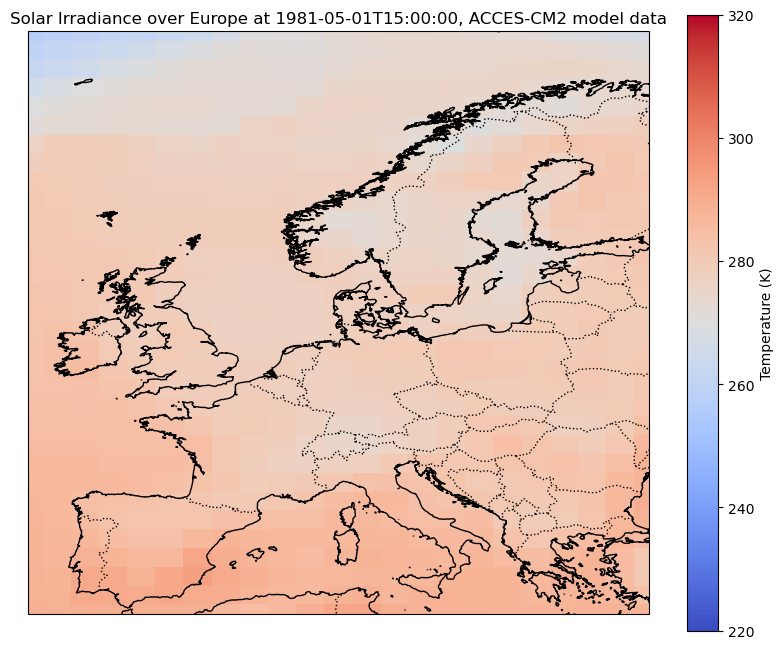

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

tas_europe_var = tas_europe['tas']

# Select solar irradiance for the specific time
specific_time = "1981-05-01T15:00:00"
tas_europe_at_time = tas_europe_var.sel(time=specific_time)

# Get coordinate limits from the dataset
lon_min, lon_max = tas_europe_at_time.lon.min().item(), tas_europe_at_time.lon.max().item()
lat_min, lat_max = tas_europe_at_time.lat.min().item(), tas_europe_at_time.lat.max().item()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the solar irradiance at the selected time
tas_europe_at_time.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm', 
    vmin=220,  # Minimum value of the color scale
    vmax=320, # Red color scale for solar irradiance
    cbar_kwargs={'label': 'Temperature (K)'}
)

# Add map features for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')

# Set extent dynamically based on dataset coordinates
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add title and labels
plt.title(f'Temperature over Europe at {specific_time}, ACCES-CM2 model data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [58]:
# Interpolate tas to match rsds time
tas_interp = tas_europe['tas'].interp(time=ds_rsds['time'], method="linear")


In [59]:
print(tas_interp.shape)
tas_interp

(29224, 32, 23)


<xarray.DataArray 'tas' (time: 29224, lat: 32, lon: 23)> Size: 172MB
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[284.83666992, 284.06469727, 282.17285156, ..., 283.11108398,
         285.83520508, 285.2545166 ],
        [284.72277832, 283.01208496, 277.41711426, ..., 280.19580078,
         279.85095215, 279.44042969],
        [284.84692383, 282.67834473, 275.17590332, ..., 276.80932617,
         272.33349609, 274.35534668],
...
        [251.8302002 , 256.96655273, 258.03552246, ..., 273.14599609,
         272.96801758, 272.72717285],
        [249.48620605, 254.22875977, 255.63220215, ..., 270.27990723,
         270.59729004, 270.85412598],
        [243.27246094, 250.41125488, 253.46313477, ..., 267.43725586,
         267.05432129, 266.18347168]],

       [[289.02514648, 288.83215332, 288.2701416 , ..., 288.12268066,
         287.88146973, 286.90124512],
        [289.25476074, 288.77185059, 285.91821289, ..., 286.53771973,
         284.32299805, 281.95019531],
        [289.12634277, 288.68212891, 283.58557129, ..., 284.29101562,
         280.11108398, 277.76831055],
        ...,
        [251.02441406, 256.52807617, 257.88037109, ..., 272.97424316,
         272.90209961, 272.73181152],
        [248.14306641, 254.01660156, 255.86572266, ..., 271.05041504,
         271.34375   , 270.56921387],
        [242.25390625, 250.33190918, 253.45141602, ..., 267.46618652,
         267.18847656, 266.25732422]]], shape=(29224, 32, 23))
Coordinates:
  * lat      (lat) float64 256B 35.62 36.88 38.12 39.38 ... 71.88 73.12 74.38
  * lon      (lon) float64 184B -12.19 -10.31 -8.438 ... 25.31 27.19 29.06
    height   float64 8B 2.0
  * time     (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T2...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2019-11-08T03:28:02Z altered by CMOR: Treated scalar dime...

In [60]:
# Create a mask for the NaN values using .isnull()
nan_mask = tas_interp.isnull()

# For each time step, replace NaNs with the values from the next time step
for t in range(len(tas_interp.time) - 1):  # Exclude the last time step
    # Use .isel() to ensure the correct alignment of coordinates
    tas_interp[t] = tas_interp[t].where(~nan_mask[t], tas_interp.isel(time=t + 1))

In [61]:
print(tas_interp.dims)
print(tas_interp.shape)

('time', 'lat', 'lon')
(29224, 32, 23)


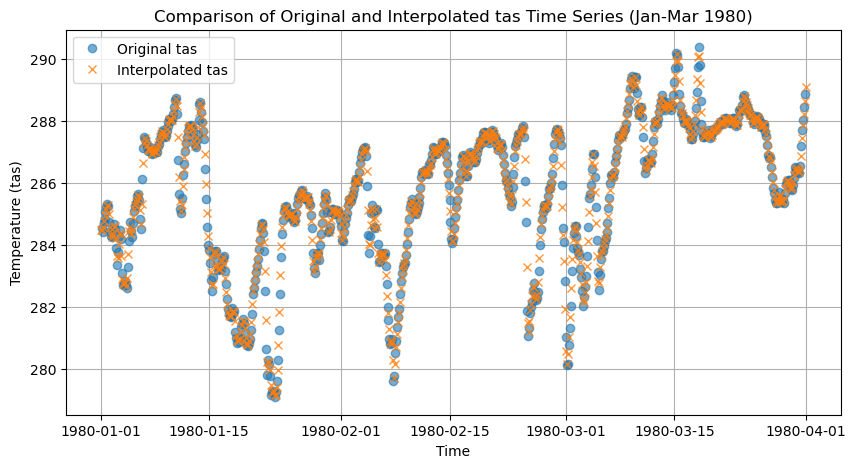

In [62]:
# Define a smaller time range (first 3 months of 1980)
time_subset = slice("1980-01-01", "1980-03-31")

# Subset the datasets
tas_subset = tas_europe['tas'].sel(time=time_subset)
tas_interp_subset = tas_interp.sel(time=time_subset)

# Select a single location for comparison
lat_sel = ds_tas['lat'].values[len(tas_europe['lat']) // 2]
lon_sel = ds_tas['lon'].values[len(tas_europe['lon']) // 2]

tas_original = tas_subset.sel(lat=lat_sel, lon=lon_sel, method='nearest')
tas_interp_plot = tas_interp_subset.sel(lat=lat_sel, lon=lon_sel, method='nearest')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(tas_original['time'], tas_original, 'o', label='Original tas', alpha=0.6)
plt.plot(tas_interp_plot['time'], tas_interp_plot, 'x', label='Interpolated tas', alpha=0.8)

plt.xlabel('Time')
plt.ylabel('Temperature (tas)')
plt.title('Comparison of Original and Interpolated tas Time Series (Jan-Mar 1980)')
plt.legend()
plt.grid()
plt.show()



In [63]:
# Check if lat and lon coordinates are the same
lat_match = (tas_europe['lat'].values == rsds_europe['lat'].values).all()
lon_match = (tas_europe['lon'].values == rsds_europe['lon'].values).all()

if lat_match and lon_match:
    print("✅ `tas` and `rsds` have the same spatial coordinates.")
else:
    print("⚠️ WARNING: `tas` and `rsds` have different spatial coordinates!")


✅ `tas` and `rsds` have the same spatial coordinates.


In [64]:
tas_interp

<xarray.DataArray 'tas' (time: 29224, lat: 32, lon: 23)> Size: 172MB
array([[[284.83666992, 284.06469727, 282.17285156, ..., 283.11108398,
         285.83520508, 285.2545166 ],
        [284.72277832, 283.01208496, 277.41711426, ..., 280.19580078,
         279.85095215, 279.44042969],
        [284.84692383, 282.67834473, 275.17590332, ..., 276.80932617,
         272.33349609, 274.35534668],
        ...,
        [269.16040039, 270.60705566, 271.49645996, ..., 276.09289551,
         276.28015137, 276.28723145],
        [269.15429688, 269.83520508, 270.68322754, ..., 276.33886719,
         276.27380371, 276.20825195],
        [263.37756348, 267.7421875 , 269.40795898, ..., 275.90161133,
         275.89929199, 275.70007324]],

       [[284.83666992, 284.06469727, 282.17285156, ..., 283.11108398,
         285.83520508, 285.2545166 ],
        [284.72277832, 283.01208496, 277.41711426, ..., 280.19580078,
         279.85095215, 279.44042969],
        [284.84692383, 282.67834473, 275.17590332, ..., 276.80932617,
         272.33349609, 274.35534668],
...
        [251.8302002 , 256.96655273, 258.03552246, ..., 273.14599609,
         272.96801758, 272.72717285],
        [249.48620605, 254.22875977, 255.63220215, ..., 270.27990723,
         270.59729004, 270.85412598],
        [243.27246094, 250.41125488, 253.46313477, ..., 267.43725586,
         267.05432129, 266.18347168]],

       [[289.02514648, 288.83215332, 288.2701416 , ..., 288.12268066,
         287.88146973, 286.90124512],
        [289.25476074, 288.77185059, 285.91821289, ..., 286.53771973,
         284.32299805, 281.95019531],
        [289.12634277, 288.68212891, 283.58557129, ..., 284.29101562,
         280.11108398, 277.76831055],
        ...,
        [251.02441406, 256.52807617, 257.88037109, ..., 272.97424316,
         272.90209961, 272.73181152],
        [248.14306641, 254.01660156, 255.86572266, ..., 271.05041504,
         271.34375   , 270.56921387],
        [242.25390625, 250.33190918, 253.45141602, ..., 267.46618652,
         267.18847656, 266.25732422]]], shape=(29224, 32, 23))
Coordinates:
  * lat      (lat) float64 256B 35.62 36.88 38.12 39.38 ... 71.88 73.12 74.38
  * lon      (lon) float64 184B -12.19 -10.31 -8.438 ... 25.31 27.19 29.06
    height   float64 8B 2.0
  * time     (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T2...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2019-11-08T03:28:02Z altered by CMOR: Treated scalar dime...

In [65]:
print(tas_interp.shape)  # Check the shape of interpolated data
print(ds_rsds['time'].shape)  # Check the shape of the target time coordinate
print(tas_europe['lat'].shape)  # Check the shape of lat coordinates
print(tas_europe['lon'].shape)  # Check the shape of lon coordinates

(29224, 32, 23)
(29224,)
(32,)
(23,)


In [69]:
tas_interp

<xarray.DataArray 'tas' (time: 29224, lat: 32, lon: 23)> Size: 172MB
array([[[284.83666992, 284.06469727, 282.17285156, ..., 283.11108398,
         285.83520508, 285.2545166 ],
        [284.72277832, 283.01208496, 277.41711426, ..., 280.19580078,
         279.85095215, 279.44042969],
        [284.84692383, 282.67834473, 275.17590332, ..., 276.80932617,
         272.33349609, 274.35534668],
        ...,
        [269.16040039, 270.60705566, 271.49645996, ..., 276.09289551,
         276.28015137, 276.28723145],
        [269.15429688, 269.83520508, 270.68322754, ..., 276.33886719,
         276.27380371, 276.20825195],
        [263.37756348, 267.7421875 , 269.40795898, ..., 275.90161133,
         275.89929199, 275.70007324]],

       [[284.83666992, 284.06469727, 282.17285156, ..., 283.11108398,
         285.83520508, 285.2545166 ],
        [284.72277832, 283.01208496, 277.41711426, ..., 280.19580078,
         279.85095215, 279.44042969],
        [284.84692383, 282.67834473, 275.17590332, ..., 276.80932617,
         272.33349609, 274.35534668],
...
        [251.8302002 , 256.96655273, 258.03552246, ..., 273.14599609,
         272.96801758, 272.72717285],
        [249.48620605, 254.22875977, 255.63220215, ..., 270.27990723,
         270.59729004, 270.85412598],
        [243.27246094, 250.41125488, 253.46313477, ..., 267.43725586,
         267.05432129, 266.18347168]],

       [[289.02514648, 288.83215332, 288.2701416 , ..., 288.12268066,
         287.88146973, 286.90124512],
        [289.25476074, 288.77185059, 285.91821289, ..., 286.53771973,
         284.32299805, 281.95019531],
        [289.12634277, 288.68212891, 283.58557129, ..., 284.29101562,
         280.11108398, 277.76831055],
        ...,
        [251.02441406, 256.52807617, 257.88037109, ..., 272.97424316,
         272.90209961, 272.73181152],
        [248.14306641, 254.01660156, 255.86572266, ..., 271.05041504,
         271.34375   , 270.56921387],
        [242.25390625, 250.33190918, 253.45141602, ..., 267.46618652,
         267.18847656, 266.25732422]]], shape=(29224, 32, 23))
Coordinates:
  * lat      (lat) float64 256B 35.62 36.88 38.12 39.38 ... 71.88 73.12 74.38
  * lon      (lon) float64 184B -12.19 -10.31 -8.438 ... 25.31 27.19 29.06
    height   float64 8B 2.0
  * time     (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T2...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: mean time: point
    cell_measures:  area: areacella
    history:        2019-11-08T03:28:02Z altered by CMOR: Treated scalar dime...

In [79]:
from datetime import datetime,timedelta
def make_data_set(du,rsds,rsdsdiff,tas):
    """Creates xarray DataArray for netCDF write

    Args:
        du (dataset): sample dataset with attributes
        rsds (DataArray): wind speed 
        rsdsdiff (DataArray): wind direction
        tas (DataArray): surface air density

    Returns:
        xarray DataArray: DataArray for write
    """
    lat = xr.DataArray(
        data=rsds.lat.values.astype('float32'),
        dims=["lat"],
        coords=dict(
            lat=(["lat"], rsds.lat.values)
        ),
        attrs=dict(
        long_name="latitude",
        units="degrees_north",
        axis="Y"
        ),
    )
    lon = xr.DataArray(
        data=rsds.lon.values.astype('float32'),
        dims="lon",
        coords=dict(
            lon=(["lon"], rsds.lon.values)
        ),
        attrs=dict(
        long_name="longitude",
        units="degrees_east",
        axis="X"
        ),
    )
    
    ds = xr.Dataset(
        data_vars=dict(
            rsds = (
                ["time","lat","lon"],rsds.values.astype('float32'),
                dict(long_name = "rsds",
                units = "W/m2")),
            rsdsdiff = (
                ["time","lat","lon"],rsdsdiff.values.astype('float32'),
                dict(long_name = "wind direction",
                units = "W/m2",
                vert_units = "W/m2")),
            tas = (
                ["time","lat","lon"],tas.values.astype('float32'),
                dict(long_name = "surface air density",
                units = "K",
                height = "surface")),
            ),
        coords=dict(
            lon=lon,
            lat=lat,
            time=rsds.time
            ),
        attrs=dict(
            data_source = "Processed data from CMIP6 runs",
            experiment = du.experiment_id,
            source = du.source_id,
            variant_label = du.variant_label,
            data_written = datetime.now().strftime("%d/%m/%Y %H:%M")
            )
    )   
    return ds

In [85]:
rsds_data = rsds_europe['rsds']
rsdsdiff_data = rsdsdiff_europe['rsdsdiff']
tas_data = tas_interp
rsds_europe
ds=make_data_set(rsds_europe,rsds_data,rsdsdiff_data,tas_data)
ds

<xarray.Dataset> Size: 258MB
Dimensions:   (time: 29224, lat: 32, lon: 23)
Coordinates:
  * lon       (lon) float32 92B -12.19 -10.31 -8.438 ... 25.31 27.19 29.06
  * lat       (lat) float32 128B 35.62 36.88 38.12 39.38 ... 71.88 73.12 74.38
  * time      (time) datetime64[ns] 234kB 1980-01-01T01:30:00 ... 1989-12-31T...
Data variables:
    rsds      (time, lat, lon) float32 86MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    rsdsdiff  (time, lat, lon) float32 86MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tas       (time, lat, lon) float32 86MB 284.8 284.1 282.2 ... 267.2 266.3
Attributes:
    data_source:    Processed data from CMIP6 runs
    experiment:     historical
    source:         ACCESS-CM2
    variant_label:  r1i1p1f1
    data_written:   03/03/2025 11:28

In [ ]:
import sys
experiment = sys.argv[1]
if (experiment == "historical"):
        year = 1980; last_year = 2014
else:
    year = 2015; last_year = 2100

In [ ]:
# Ensure combined_dataset is defined and has a 'time' dimension
if 'time' in ds.dims:
    unique_years = np.unique(ds.time.dt.year.values)
    
    for year in unique_years:
        # Extract data for this year using slicing
        yearly_data = ds.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))
        
        # Check if yearly_data is not empty
        if yearly_data.time.size > 0:
            # Save as .nc file
            yearly_data.to_netcdf(f"/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/sfcrad_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_{year}.nc")
        else:
            print(f"No data available for the year {year}")
else:
    print("The dataset does not contain a 'time' dimension.")

KeyboardInterrupt: 

In [75]:
for year in np.unique(combined_dataset.time.dt.year.values):  
    # Extract data for this year using slicing  
    yearly_data = combined_dataset.sel(time=slice(f"{year}-01-01", f"{year}-12-31"))
    
    # Save as .nc file  
    yearly_data.to_netcdf(f"/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation/sfcrad_3hr_ACCESS-CM2_historical_r1i1p1f1_gn_{year}.nc")


KeyboardInterrupt: 